Hai































## Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# GANTI DENGAN NIM LU PADA
NIM_Gweh = 12345678
np.random.seed(NIM_Gweh)
sns.set_style("whitegrid")

## Buat Fungsi Visualisasi

In [6]:
def plot_clusters(X, labels, title, ax, algorithm_name, centroids=None):
    # Definisikan fungsi untuk membuat grafik dengan 5 input ()
    
    """Fungsi untuk memvisualisasikan hasil clustering."""
    
    unique_labels = np.unique(labels)
    # Memilih nilai yang unik yang terdapat di dalam variabel "label"
    
    # Menggunakan colormap "Spectral" untuk nilai cluster bila di-set 10 atau kurang
    if len(unique_labels) <= 10:
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        
    # Menggunakan colormap "tab20" untuk nilai cluster bila di-set lebih dari 10
    elif len(unique_labels) > 10:
        colors = plt.cm.get_cmap('tab20', len(unique_labels))
        
    # Iterasi warna untuk setiap cluster yang berbeda
        colors = [colors(i) for i in range(len(unique_labels))]

    
    for k_idx, k_val in enumerate(unique_labels):

        # Ini fungsi untuk menangani bila nilai "unique_variable" lebih besar dibanding jumlah warna yang tersedia
        col = colors[k_idx % len(colors)]

        # Cek apakah nilai ada suatu titik yang bersifat, "noise". jika iya, buat "noise" menjadi hitam
        if k_val == -1:
            col = [0, 0, 0, 1]
            
        # Ini fungsi untuk nampilin titik titik xy-scatternya
        class_member_mask = (labels == k_val)
        xy = X[class_member_mask]
        if xy.size > 0 : # Pastikan ada data untuk diplot
            ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6, label=f'Cluster {k_val}' if k_val !=-1 else 'Noise')

    # Cek apakah ada centroid pada data, khusus untuk clustering "KMeans" dan "GMM"
    if centroids is not None and algorithm_name in ["K-Means", "GMM"]:

    # Kustomisasi titik centroid (posisi, bentuk, ketebalan, etc ygy)
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=150, linewidths=1,
                    color='red', zorder=10, label='Centroids' if algorithm_name == "K-Means" else "Means")

    # Set kotak untuk menampung data xy-scatter
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Fitur 1", fontsize=8)
    ax.set_ylabel("Fitur 2", fontsize=8)
    ax.legend(loc='best', fontsize='x-small')

## Buat Dataset dengan 5 Variansi

- Variasi 1: Blobs Terpisah

- Variasi 2: Blobs Agak Numpuk

- Variasi 3: Blobs Numpuk Banget ygy

- Variasi 4: Moons

- Variasi 5: Circles

In [8]:
# Variasi 1
X_blobs1, y_blobs1_true = make_blobs(n_samples=200, centers=5, cluster_std=0.70, random_state=NIM_Gweh)

# Variasi 2
X_blobs2, y_blobs2_true = make_blobs(n_samples=200, centers=[[0,0], [2,2], [0,3]], cluster_std=0.9, random_state=NIM_Gweh)

# Variasi 3
X_blobs3, y_blobs3_true = make_blobs(n_samples=200, centers=[[0,0], [1,1], [1.8,0.2]], cluster_std=1.1, random_state=NIM_Gweh)

# Moons
X_moons, y_moons_true = make_moons(n_samples=200, noise=0.08, random_state=NIM_Gweh)

# Circles
X_circles, y_circles_true = make_circles(n_samples=200, factor=0.5, noise=0.06, random_state=NIM_Gweh)

# Kumpulkan dataset dalam dictionary untuk kemudahan akses
# Format: "Nama Dataset": (Data, True Labels, Perkiraan Jumlah Cluster untuk K-Means/GMM)
datasets_original = {
    "Blobs_Terpisah": (X_blobs1, y_blobs1_true, 5),
    "Blobs_Agak_Numpuk": (X_blobs2, y_blobs2_true, 3),
    "Blobs_Numpuk_Banget": (X_blobs3, y_blobs3_true, 3),
    "Moons": (X_moons, y_moons_true, 2),
    "Circles": (X_circles, y_circles_true, 2)
}

## Preprocessing (Scaling aja)
Bikin fungsi scaling untuk seluruh dictionary `datasets_original`

In [10]:
scaled_datasets = {}
for name, (X, y_true, k_expected) in datasets_original.items():
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    scaled_datasets[name] = (X_scaled, y_true, k_expected)

## Pilih Dataset dan Visualisasi Awal

Ganti dengan salah satu nama dari: `Blobs_Terpisah`, `Blobs_Agak_Numpuk`, `Blobs_Numpuk_Banget`, `Moons`, `Circles`

dicoba-coba ygy, **jangan males**

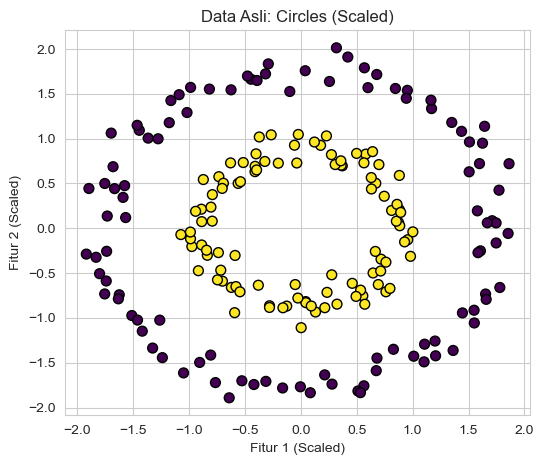

In [12]:
Variasi_Dataset = "Blobs_Terpisah"

X_current, y_current_true, k_current_expected = scaled_datasets[Variasi_Dataset]

# Visualisasi data asli (dengan label sebenarnya jika ada)
plt.figure(figsize=(6, 5))
plt.scatter(X_current[:, 0], X_current[:, 1], c=y_current_true, cmap='viridis', edgecolor='k', s=50)
plt.title(f"Data Asli: {Variasi_Dataset} (Scaled)")
plt.xlabel("Fitur 1 (Scaled)")
plt.ylabel("Fitur 2 (Scaled)")
plt.show()

## Implementasi KMeans

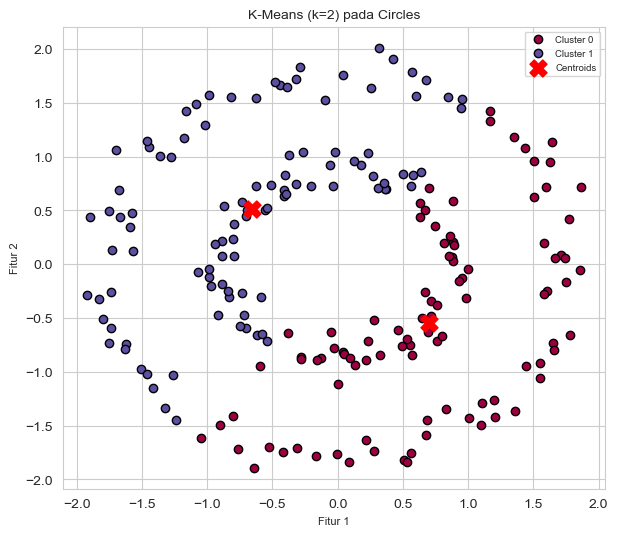

In [14]:
# Menggunakan jumlah cluster yang diharapkan dari pembuatan dataset
k_untuk_kmeans = k_current_expected

kmeans = KMeans(n_clusters=k_untuk_kmeans, random_state=NIM_Gweh, n_init='auto')
labels_kmeans = kmeans.fit_predict(X_current)
centroids_kmeans = kmeans.cluster_centers_

# Visualisasi K-Means
fig_kmeans, ax_kmeans = plt.subplots(1, 1, figsize=(7, 6))
plot_clusters(X_current, labels_kmeans, f"K-Means (k={k_untuk_kmeans}) pada {Variasi_Dataset}", ax_kmeans, "K-Means", centroids=centroids_kmeans)
plt.show()

## Implementasi DBSCAN

**PARAMETER DBSCAN (PERLU DISESUAIKAN PER DATASET)**

Ini cuma nilai awal yg gw set, atur2 aja sendiri


**Tips:**
- `Moons` & `Circles`: eps seringkali kecil (misal 0.2-0.4 setelah scaling)
- `Blobs`: eps tergantung kerapatan.
  - Blobs yang terpisah baik -> eps lebih kecil
  - Blobs overlap -> eps lebih besar.
- `min_samples_val`: nilai umum **3-10**.
  - Untuk data 2D, `min_samples_val`= **4 atau 5** bisa lu jadiin nilai default/awal

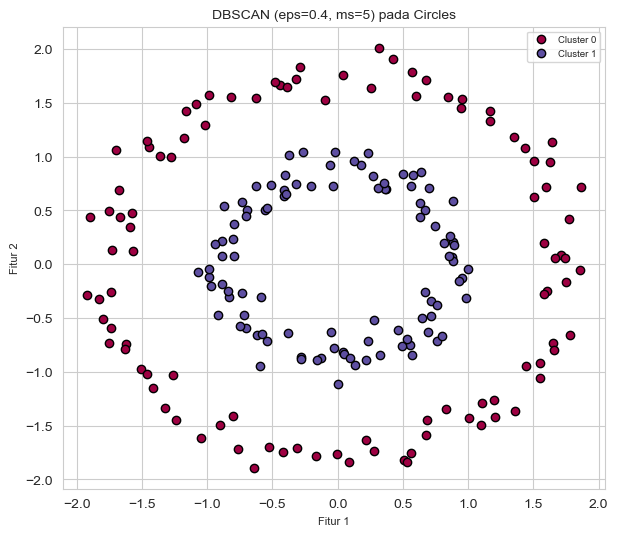

In [16]:
#Inisiasi nilai "eps_val" dan "min_samples_val"
if Variasi_Dataset == "Moons":
    eps_val = 0.4
    min_samples_val = 5
elif Variasi_Dataset == "Circles":
    eps_val = 0.4
    min_samples_val = 5
elif Variasi_Dataset == "Blobs_Terpisah":
    eps_val = 0.45 # Coba naikkan jika cluster terpecah, turunkan jika menyatu
    min_samples_val = 5
elif Variasi_Dataset == "Blobs_Agak_Numpuk":
    eps_val = 0.6 # Mungkin perlu eps lebih besar
    min_samples_val = 5
elif Variasi_Dataset == "Blobs_Numpuk_Banget":
    eps_val = 0.8 # Mungkin perlu eps lebih besar lagi
    min_samples_val = 5
else: # Default, jika ada dataset baru
    eps_val = 0.5
    min_samples_val = 5


# Masukkan model DBSCAN ke dalan suatu Variabel
dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)

# Lakukan training pada model DBSCAN yang telah dimasukkan ke dalam variabel sebelumnya
labels_dbscan = dbscan.fit_predict(X_current)

# Visualisasi DBSCAN
fig_dbscan, ax_dbscan = plt.subplots(1, 1, figsize=(7, 6))
plot_clusters(X_current, labels_dbscan, f"DBSCAN (eps={eps_val}, ms={min_samples_val}) pada {Variasi_Dataset}", ax_dbscan, "DBSCAN")
plt.show()

## Implementasi GMM

info `covariance_type` dapat diakses di sini
https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

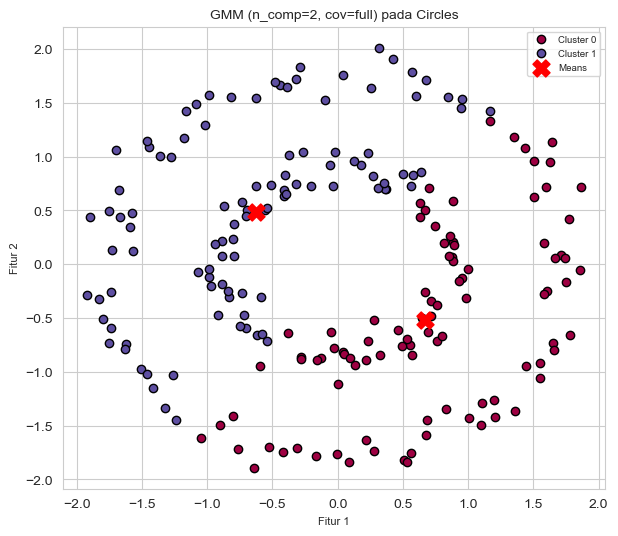

In [18]:
# Menggunakan jumlah komponen yang diharapkan dari pembuatan dataset
n_komponen_gmm = k_current_expected

# covariance_type: 'full', 'tied', 'diag', 'spherical'
# 'full' paling fleksibel, 'spherical' paling mirip K-Means
cov_type_gmm = 'full'

# Masukkan model Gaussian Mixture ke dalan suatu Variabel
gmm = GaussianMixture(n_components=n_komponen_gmm,
                      random_state=NIM_Gweh,
                      covariance_type=cov_type_gmm)

# Lakukan training pada model gaussian yang telah dimasukkan ke dalam variabel sebelumnya
labels_gmm = gmm.fit_predict(X_current)

# Cari Pusat dari komponen gaussian
means_gmm = gmm.means_

# Visualisasi GMM
fig_gmm, ax_gmm = plt.subplots(1, 1, figsize=(7, 6))
plot_clusters(X_current, labels_gmm, f"GMM (n_comp={n_komponen_gmm}, cov={cov_type_gmm}) pada {Variasi_Dataset}", ax_gmm, "GMM", centroids=means_gmm)
plt.show()